### Model 1

In [1]:
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')

data = data.set_index('date')

data = data.dropna(axis=1)

mean = data[:'2019-01-31'].mean(axis=0)
data -= mean
std = data[:'2019-01-31'].std(axis=0)
data /= std

import numpy as np
data = np.array(data)

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets
        
        
lookback = 50
step = 5
delay = 1
batch_size = 35

train_gen = generator(data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 2004,
                      shuffle = True,
                      step = step,
                      batch_size = batch_size)
val_gen = generator(data,
                    lookback = lookback,
                    delay = delay,
                    min_index = 2005,
                    max_index = 2249,
                    shuffle = True,
                    step = step,
                    batch_size = batch_size)

test_gen = generator(data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 2250,
                     max_index = None,
                     shuffle = False,
                     step = step,
                     batch_size = batch_size)

val_steps = (2249 - 2005 - lookback) // batch_size

test_steps = (len(data) - 2250 - lookback) // batch_size

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

# Model
import seaborn as sns
import matplotlib.pyplot as plt
result = pd.DataFrame(model.predict_generator(test_gen, steps=test_steps+2)*std[-1] + mean[-1])
result.columns = ['Model(50,5,1,35)']
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')
data = data.set_index('date')
data = data.dropna(axis=1)
tttt_1 = data['2019-02-01':'2020-01-31']
tttt_1 = tttt_1['USD']
tttt_1 = tttt_1.reset_index()
tttt_1 = pd.concat([tttt_1,result], axis=1)
tttt_1 = tttt_1.set_index('date')

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
500/500 [==============================] - 17s 34ms/step - loss: 0.4058 - val_loss: 0.1692
Epoch 2/20
500/500 [==============================] - 13s 26ms/step - loss: 0.3513 - val_loss: 0.2144
Epoch 3/20
500/500 [==============================] - 13s 25ms/step - loss: 0.3331 - val_loss: 0.2212
Epoch 4/20
500/500 [==============================] - 13s 26ms/step - loss: 0.3201 - val_loss: 0.2013
Epoch 5/20
500/500 [==============================] - 13s 26ms/step - loss: 0.3003 - val_loss: 0.1903
Epoch 6/20
500/500 [==============================] - 12s 25ms/step - loss: 0.2901 - val_loss: 0.2058
Epoch 7/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2803 - val_loss: 0.2093
Epoch 8/20
500/500 [==============================] - 13s 26ms/step - l

In [2]:
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')

data = data.set_index('date')

data = data.dropna(axis=1)

mean = data[:'2019-01-31'].mean(axis=0)
data -= mean
std = data[:'2019-01-31'].std(axis=0)
data /= std

import numpy as np
data = np.array(data)

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets
        
        
lookback = 1
step = 1
delay = 1
batch_size = 35

train_gen = generator(data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 2004,
                      shuffle = True,
                      step = step,
                      batch_size = batch_size)
val_gen = generator(data,
                    lookback = lookback,
                    delay = delay,
                    min_index = 2005,
                    max_index = 2249,
                    shuffle = True,
                    step = step,
                    batch_size = batch_size)

test_gen = generator(data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 2250,
                     max_index = None,
                     shuffle = False,
                     step = step,
                     batch_size = batch_size)

val_steps = (2249 - 2005 - lookback) // batch_size

test_steps = (len(data) - 2250 - lookback) // batch_size

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

# Model
import seaborn as sns
import matplotlib.pyplot as plt
result = pd.DataFrame(model.predict_generator(test_gen, steps=test_steps+1)*std[-1] + mean[-1])
result.columns = ['Model(1,1,1,35)']
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')
data = data.set_index('date')
data = data.dropna(axis=1)
tttt_2 = data['2019-02-01':'2020-01-31']
tttt_2 = tttt_2['USD']
tttt_2 = tttt_2.reset_index()
tttt_2 = pd.concat([tttt_2,result], axis=1)
tttt_2 = tttt_2.set_index('date')
del tttt_2['USD']

Epoch 1/20
500/500 [==============================] - 5s 10ms/step - loss: 0.3509 - val_loss: 0.1406
Epoch 2/20
500/500 [==============================] - 4s 9ms/step - loss: 0.2860 - val_loss: 0.1446
Epoch 3/20
500/500 [==============================] - 4s 9ms/step - loss: 0.2817 - val_loss: 0.1402
Epoch 4/20
500/500 [==============================] - 4s 9ms/step - loss: 0.2732 - val_loss: 0.1554
Epoch 5/20
500/500 [==============================] - 4s 9ms/step - loss: 0.2623 - val_loss: 0.1443
Epoch 6/20
500/500 [==============================] - 4s 9ms/step - loss: 0.2619 - val_loss: 0.1309
Epoch 7/20
500/500 [==============================] - 4s 9ms/step - loss: 0.2633 - val_loss: 0.1482
Epoch 8/20
500/500 [==============================] - 4s 9ms/step - loss: 0.2539 - val_loss: 0.1446
Epoch 9/20
500/500 [==============================] - 4s 9ms/step - loss: 0.2591 - val_loss: 0.1445
Epoch 10/20
500/500 [==============================] - 4s 9ms/step - loss: 0.2570 - val_loss: 0.126

In [3]:
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')

data = data.set_index('date')

data = data.dropna(axis=1)

mean = data[:'2019-01-31'].mean(axis=0)
data -= mean
std = data[:'2019-01-31'].std(axis=0)
data /= std

import numpy as np
data = np.array(data)

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets
        
        
lookback = 5
step = 1
delay = 1
batch_size = 35

train_gen = generator(data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 2004,
                      shuffle = True,
                      step = step,
                      batch_size = batch_size)
val_gen = generator(data,
                    lookback = lookback,
                    delay = delay,
                    min_index = 2005,
                    max_index = 2249,
                    shuffle = True,
                    step = step,
                    batch_size = batch_size)

test_gen = generator(data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 2250,
                     max_index = None,
                     shuffle = False,
                     step = step,
                     batch_size = batch_size)

val_steps = (2249 - 2005 - lookback) // batch_size

test_steps = (len(data) - 2250 - lookback) // batch_size

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

# Model
import seaborn as sns
import matplotlib.pyplot as plt
result = pd.DataFrame(model.predict_generator(test_gen, steps=test_steps+1)*std[-1] + mean[-1])
result.columns = ['Model(5,1,1,35)']
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')
data = data.set_index('date')
data = data.dropna(axis=1)
tttt_3 = data['2019-02-01':'2020-01-31']
tttt_3 = tttt_3['USD']
tttt_3 = tttt_3.reset_index()
tttt_3 = pd.concat([tttt_3,result], axis=1)
tttt_3 = tttt_3.set_index('date')
del tttt_3['USD']

Epoch 1/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3167 - val_loss: 0.1476
Epoch 2/20
500/500 [==============================] - 8s 17ms/step - loss: 0.2853 - val_loss: 0.1386
Epoch 3/20
500/500 [==============================] - 8s 17ms/step - loss: 0.2740 - val_loss: 0.1637
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2721 - val_loss: 0.1580
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2549 - val_loss: 0.1431
Epoch 6/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2394 - val_loss: 0.1320
Epoch 7/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2288 - val_loss: 0.1476
Epoch 8/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2189 - val_loss: 0.1542
Epoch 9/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2055 - val_loss: 0.1490
Epoch 10/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1968 - val_lo

In [4]:
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')

data = data.set_index('date')

data = data.dropna(axis=1)

mean = data[:'2019-01-31'].mean(axis=0)
data -= mean
std = data[:'2019-01-31'].std(axis=0)
data /= std

import numpy as np
data = np.array(data)

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets
        
        
lookback = 10
step = 1
delay = 1
batch_size = 35

train_gen = generator(data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 2004,
                      shuffle = True,
                      step = step,
                      batch_size = batch_size)
val_gen = generator(data,
                    lookback = lookback,
                    delay = delay,
                    min_index = 2005,
                    max_index = 2249,
                    shuffle = True,
                    step = step,
                    batch_size = batch_size)

test_gen = generator(data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 2250,
                     max_index = None,
                     shuffle = False,
                     step = step,
                     batch_size = batch_size)

val_steps = (2249 - 2005 - lookback) // batch_size

test_steps = (len(data) - 2250 - lookback) // batch_size

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

# Model
import seaborn as sns
import matplotlib.pyplot as plt
result = pd.DataFrame(model.predict_generator(test_gen, steps=test_steps+1)*std[-1] + mean[-1])
result.columns = ['Model(10,1,1,35)']
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')
data = data.set_index('date')
data = data.dropna(axis=1)
tttt_4 = data['2019-02-01':'2020-01-31']
tttt_4 = tttt_4['USD']
tttt_4 = tttt_4.reset_index()
tttt_4 = pd.concat([tttt_4,result], axis=1)
tttt_4 = tttt_4.set_index('date')
del tttt_4['USD']

Epoch 1/20
500/500 [==============================] - 14s 28ms/step - loss: 0.3074 - val_loss: 0.1545
Epoch 2/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2834 - val_loss: 0.1347
Epoch 3/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2796 - val_loss: 0.1639
Epoch 4/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2735 - val_loss: 0.1541
Epoch 5/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2658 - val_loss: 0.1556
Epoch 6/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2483 - val_loss: 0.1619
Epoch 7/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2389 - val_loss: 0.1652
Epoch 8/20
500/500 [==============================] - 13s 27ms/step - loss: 0.2313 - val_loss: 0.1510
Epoch 9/20
500/500 [==============================] - 13s 26ms/step - loss: 0.2135 - val_loss: 0.1619
Epoch 10/20
500/500 [==============================] - 13s 26ms/step - loss: 0.206

In [5]:
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')

data = data.set_index('date')

data = data.dropna(axis=1)

mean = data[:'2019-01-31'].mean(axis=0)
data -= mean
std = data[:'2019-01-31'].std(axis=0)
data /= std

import numpy as np
data = np.array(data)

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets
        
        
lookback = 2
step = 1
delay = 1
batch_size = 35

train_gen = generator(data,
                      lookback = lookback,
                      delay = delay,
                      min_index = 0,
                      max_index = 2004,
                      shuffle = True,
                      step = step,
                      batch_size = batch_size)
val_gen = generator(data,
                    lookback = lookback,
                    delay = delay,
                    min_index = 2005,
                    max_index = 2249,
                    shuffle = True,
                    step = step,
                    batch_size = batch_size)

test_gen = generator(data,
                     lookback = lookback,
                     delay = delay,
                     min_index = 2250,
                     max_index = None,
                     shuffle = False,
                     step = step,
                     batch_size = batch_size)

val_steps = (2249 - 2005 - lookback) // batch_size

test_steps = (len(data) - 2250 - lookback) // batch_size

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, 
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

# Model
import seaborn as sns
import matplotlib.pyplot as plt
result = pd.DataFrame(model.predict_generator(test_gen, steps=test_steps+1)*std[-1] + mean[-1])
result.columns = ['Model(2,1,1,35)']
import pandas as pd
data = pd.read_csv('../data/DAILY_DATA.csv')
data = data.set_index('date')
data = data.dropna(axis=1)
tttt_5 = data['2019-02-01':'2020-01-31']
tttt_5 = tttt_5['USD']
tttt_5 = tttt_5.reset_index()
tttt_5 = pd.concat([tttt_5,result], axis=1)
tttt_5 = tttt_5.set_index('date')
del tttt_5['USD']

Epoch 1/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3396 - val_loss: 0.1420
Epoch 2/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2876 - val_loss: 0.1417
Epoch 3/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2795 - val_loss: 0.1497
Epoch 4/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2637 - val_loss: 0.1384
Epoch 5/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2560 - val_loss: 0.1499
Epoch 6/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2459 - val_loss: 0.1169
Epoch 7/20
500/500 [==============================] - 6s 12ms/step - loss: 0.2397 - val_loss: 0.1243
Epoch 8/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2303 - val_loss: 0.1199
Epoch 9/20
500/500 [==============================] - 6s 11ms/step - loss: 0.2242 - val_loss: 0.1187
Epoch 10/20
500/500 [==============================] - 6s 12ms/step - loss: 0.2157 - val_lo

In [107]:
tttt = pd.concat([tttt_1, tttt_2, tttt_3, tttt_4, tttt_5], axis=1)

In [108]:
tttt

,USD,"Model(50,5,1,35)","Model(1,1,1,35)","Model(5,1,1,35)","Model(10,1,1,35)","Model(2,1,1,35)"
date,,,,,,
2019-02-01,1111.6,1125.143188,1115.359131,1117.472534,1123.354126,1124.329712
2019-02-07,1116.8,1127.871704,1121.261963,1114.260986,1120.067627,1125.408813
2019-02-08,1123.4,1123.575684,1122.498535,1117.392700,1121.646729,1125.291016
2019-02-11,1124.5,1123.945679,1122.327026,1120.010132,1122.535400,1125.071045
2019-02-12,1124.5,1124.770996,1122.178833,1117.122925,1118.812500,1121.768311
...,...,...,...,...,...,...
2020-01-23,1165.1,1149.510376,1123.858643,1128.978149,1129.815063,1131.105469
2020-01-28,1167.2,1150.618164,1127.377197,1131.536011,1129.969971,1135.477783
2020-01-29,1176.7,1151.004395,1132.041260,1130.371094,1130.541016,1131.717896


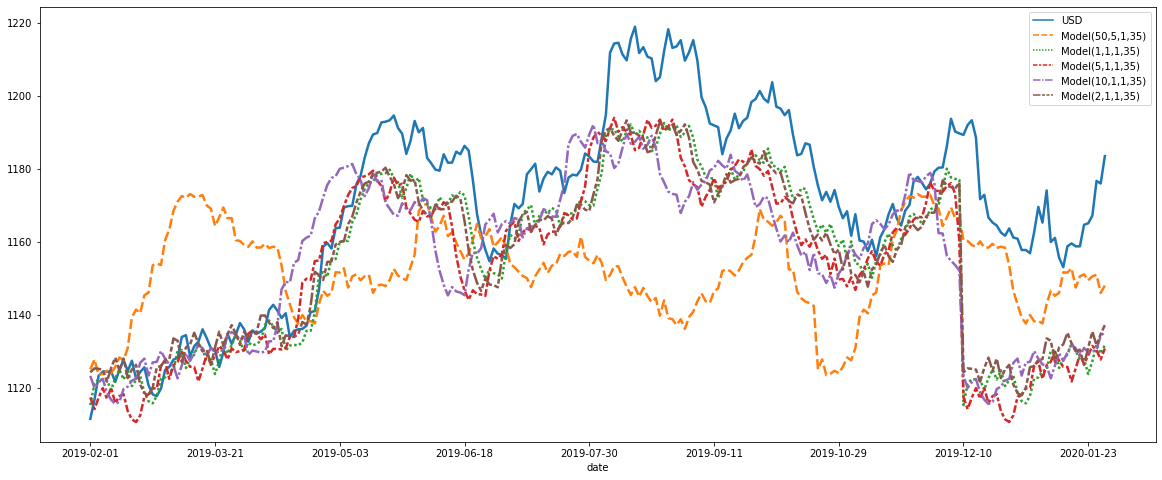

In [109]:
plt.figure(figsize=(20,8))
ax = sns.lineplot(data=tttt, palette="tab10", linewidth=2.5)
ax.set(xticks = tttt.index[0::30])
plt.show()

In [110]:
tttt['PRED'] = (tttt['Model(50,5,1,35)'] + tttt['Model(1,1,1,35)'] + tttt['Model(5,1,1,35)'] +
                tttt['Model(10,1,1,35)'] + tttt['Model(2,1,1,35)'])/5
tttt

,USD,"Model(50,5,1,35)","Model(1,1,1,35)","Model(5,1,1,35)","Model(10,1,1,35)","Model(2,1,1,35)",PRED
date,,,,,,,
2019-02-01,1111.6,1125.143188,1115.359131,1117.472534,1123.354126,1124.329712,1121.131714
2019-02-07,1116.8,1127.871704,1121.261963,1114.260986,1120.067627,1125.408813,1121.774170
2019-02-08,1123.4,1123.575684,1122.498535,1117.392700,1121.646729,1125.291016,1122.080811
2019-02-11,1124.5,1123.945679,1122.327026,1120.010132,1122.535400,1125.071045,1122.777954
2019-02-12,1124.5,1124.770996,1122.178833,1117.122925,1118.812500,1121.768311,1120.930664
...,...,...,...,...,...,...,...
2020-01-23,1165.1,1149.510376,1123.858643,1128.978149,1129.815063,1131.105469,1132.653564
2020-01-28,1167.2,1150.618164,1127.377197,1131.536011,1129.969971,1135.477783,1134.995728
2020-01-29,1176.7,1151.004395,1132.041260,1130.371094,1130.541016,1131.717896,1135.135132


In [111]:
tttt['error'] = tttt['USD'] - tttt['PRED']
np.mean(tttt['error']*tttt['error'])**0.5

21.938829171805658